# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import numpy as np
import gmaps
import requests
import holoviews as hv

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,udachny,66.4167,112.4000,-39.20,72,98,1.19,RU,1701731053
1,1,agat village,13.3886,144.6585,29.42,82,100,8.23,GU,1701731054
2,2,bhimunipatnam,17.8833,83.4333,23.24,92,100,5.75,IN,1701731055
3,3,port mathurin,-19.6833,63.4167,25.76,82,4,3.61,MU,1701731056
4,4,stanley,54.8680,-1.6985,5.43,93,75,5.14,GB,1701730778


# Step 1: Create a map that displays a point for every city in the city_data_df DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
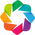

:Points   [Lng,Lat]   (Humidity,City)

In [11]:
# Create a scatter plot using hvplot.points for geographic data
map_plot = city_data_df.hvplot.points(
    x='Lng',
    y='Lat',
    size='Humidity',
    title='City Humidity Map',
    xlim=(-180, 180),
    ylim=(-90, 90),
    geo=True,
    hover_cols=['City', 'Humidity'],
    frame_width=1000,
    frame_height=600
)

# Show the plot
hv.extension('bokeh')
map_plot


# DataFrame with ideal weather condition

In [12]:
# Naaarrow down cities that fit criteria and drop any results with null values
myFavoriteWeather = city_data_df.loc[
    (city_data_df['Max Temp'] >= 21) & 
    (city_data_df['Max Temp'] <= 32) & 
    (city_data_df['Wind Speed'] <= 20) & 
    (city_data_df['Humidity'] <= 40) & 
    (city_data_df['Cloudiness'] <= 50)
]

myFavoriteWeather

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
38,38,ulladulla,-35.3500,150.4667,28.76,39,39,2.53,AU,1701731070
278,278,san rafael,-34.6177,-68.3301,24.92,20,5,5.35,AR,1701731168
346,346,santiago,-33.4569,-70.6483,24.69,30,0,5.66,CL,1701731197
390,390,manga,11.6636,-1.0731,25.95,17,39,3.50,BF,1701731215
435,435,alice springs,-23.7000,133.8833,29.75,26,0,2.57,AU,1701730972
468,468,alaghsas,17.0187,8.0168,22.96,17,23,5.16,NE,1701731246
476,476,nuriootpa,-34.4833,139.0000,25.77,25,47,1.86,AU,1701731250
559,559,ouahigouya,13.5828,-2.4216,25.24,18,14,4.03,BF,1701731292


# Create a new DataFrame called hotel_df

In [13]:
# Create hotel_df using the copy function
hotel_df = myFavoriteWeather[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column "Hotel Name"
hotel_df['Hotel Name'] = ""

# Reset the index
hotel_df.reset_index(drop=True, inplace=True)

# Display sample data
hotel_df


,City,Country,Lat,Lng,Humidity,Hotel Name
0,ulladulla,AU,-35.3500,150.4667,39,
1,san rafael,AR,-34.6177,-68.3301,20,
2,santiago,CL,-33.4569,-70.6483,30,
3,manga,BF,11.6636,-1.0731,17,
4,alice springs,AU,-23.7000,133.8833,26,
5,alaghsas,NE,17.0187,8.0168,17,
6,nuriootpa,AU,-34.4833,139.0000,25,
7,ouahigouya,BF,13.5828,-2.4216,18,


In [14]:
import requests

# Set parameters to search for a hotel
radius = 1000000
params = {
    'type': 'hotel',
    'radius': radius,
    'limit': 1,
    'apiKey': 'YOUR_API_KEY'
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row['Lat']
    lng = row['Lng']

    # Add filter and bias parameters to the params dictionary
    params['filter'] = f"category:hotels;circle:{radius}@{lng},{lat}"
    params['bias'] = f"circle:{radius}@{lng},{lat}"

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    result = response.json()

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_name = result['features'][0]['properties']['name']
        hotel_df.loc[index, "Hotel Name"] = hotel_name
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
print(hotel_df)


Starting hotel search
ulladulla - nearest hotel: No hotel found
san rafael - nearest hotel: No hotel found
santiago - nearest hotel: No hotel found
manga - nearest hotel: No hotel found
alice springs - nearest hotel: No hotel found
alaghsas - nearest hotel: No hotel found
nuriootpa - nearest hotel: No hotel found
ouahigouya - nearest hotel: No hotel found
            City Country      Lat       Lng  Humidity      Hotel Name
0      ulladulla      AU -35.3500  150.4667        39  No hotel found
1     san rafael      AR -34.6177  -68.3301        20  No hotel found
2       santiago      CL -33.4569  -70.6483        30  No hotel found
3          manga      BF  11.6636   -1.0731        17  No hotel found
4  alice springs      AU -23.7000  133.8833        26  No hotel found
5       alaghsas      NE  17.0187    8.0168        17  No hotel found
6      nuriootpa      AU -34.4833  139.0000        25  No hotel found
7     ouahigouya      BF  13.5828   -2.4216        18  No hotel found
